In [1]:
# 標準ライブラリ
from datetime import datetime, timedelta

# サードパーティライブラリ
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# プロジェクト内モジュール
from gamedata import hard_sales as hs
from gamedata import plot_hard as ph

In [2]:
hard_sales_df = hs.load_hard_sales(normalize7=True)
hard_list = hs.get_hw_names(hard_sales_df)

In [ ]:
pivot_df = hs.pivot_cumulative_sales_by_delta(hard_sales_df)
pivot_df[['NS2', 'NSW', 'PS4', 'PS5']]
pivot_df.reset_index(inplace=True)

hw,3DS,DC,DS,GB,GBA,GC,N64,NS2,NSW,NeoGeoP,...,PSP,SATURN,Vita,WS,Wii,WiiU,XB360,XBOne,XSX,Xbox
delta_day,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,166074.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,371326.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,321407.0,NaN,371936.0,308570.0,62135.0,NaN,NaN,NaN
2,NaN,101490.0,NaN,NaN,NaN,133719.0,NaN,NaN,330637.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123929.0
3,NaN,NaN,441485.0,NaN,NaN,NaN,NaN,947931.0,NaN,NaN,...,NaN,NaN,NaN,102655.0,NaN,NaN,NaN,23562.0,NaN,NaN
4,NaN,NaN,NaN,NaN,611504.0,NaN,NaN,NaN,NaN,21471.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6890,NaN,NaN,NaN,6922002.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6897,NaN,NaN,NaN,6922358.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6904,NaN,NaN,NaN,6922802.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/p4/348jfj6522l78r8xkkk0csb40000gn/T/ipykernel_19386/437573894.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


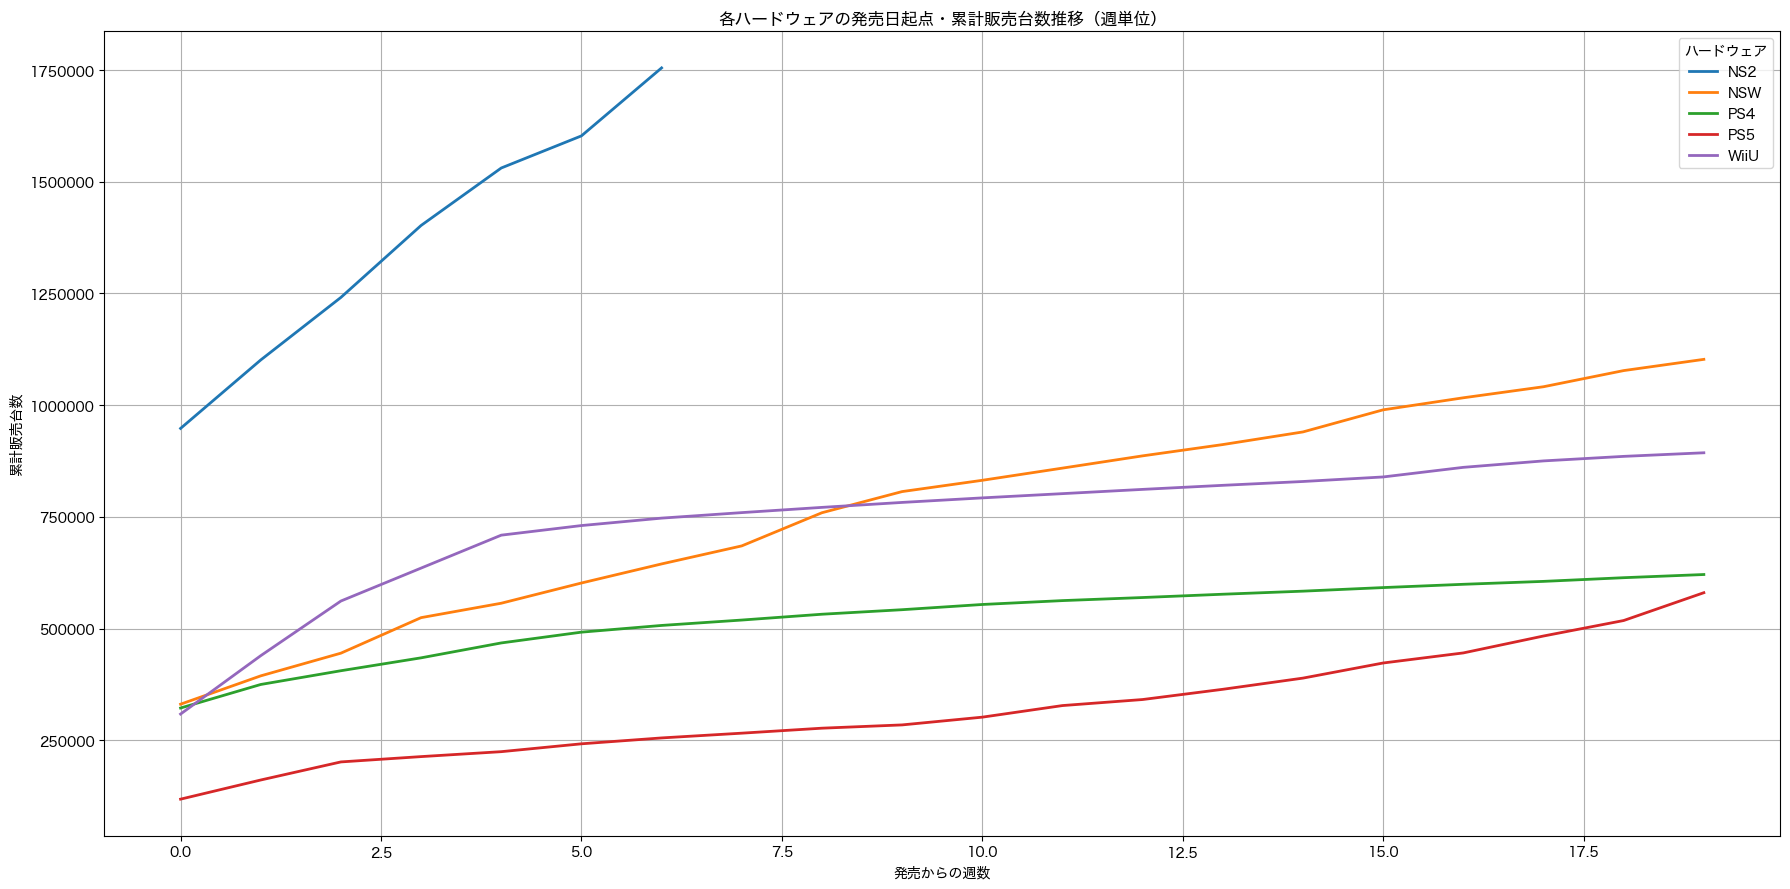

In [12]:
fig = ph.plot_cumulative_sales_by_delta(hard_sales_df, ["NS2", "NSW", "PS5", "PS4", "WiiU"], limit=20, monthly=False)
fig.show()

/var/folders/p4/348jfj6522l78r8xkkk0csb40000gn/T/ipykernel_19386/1358273234.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


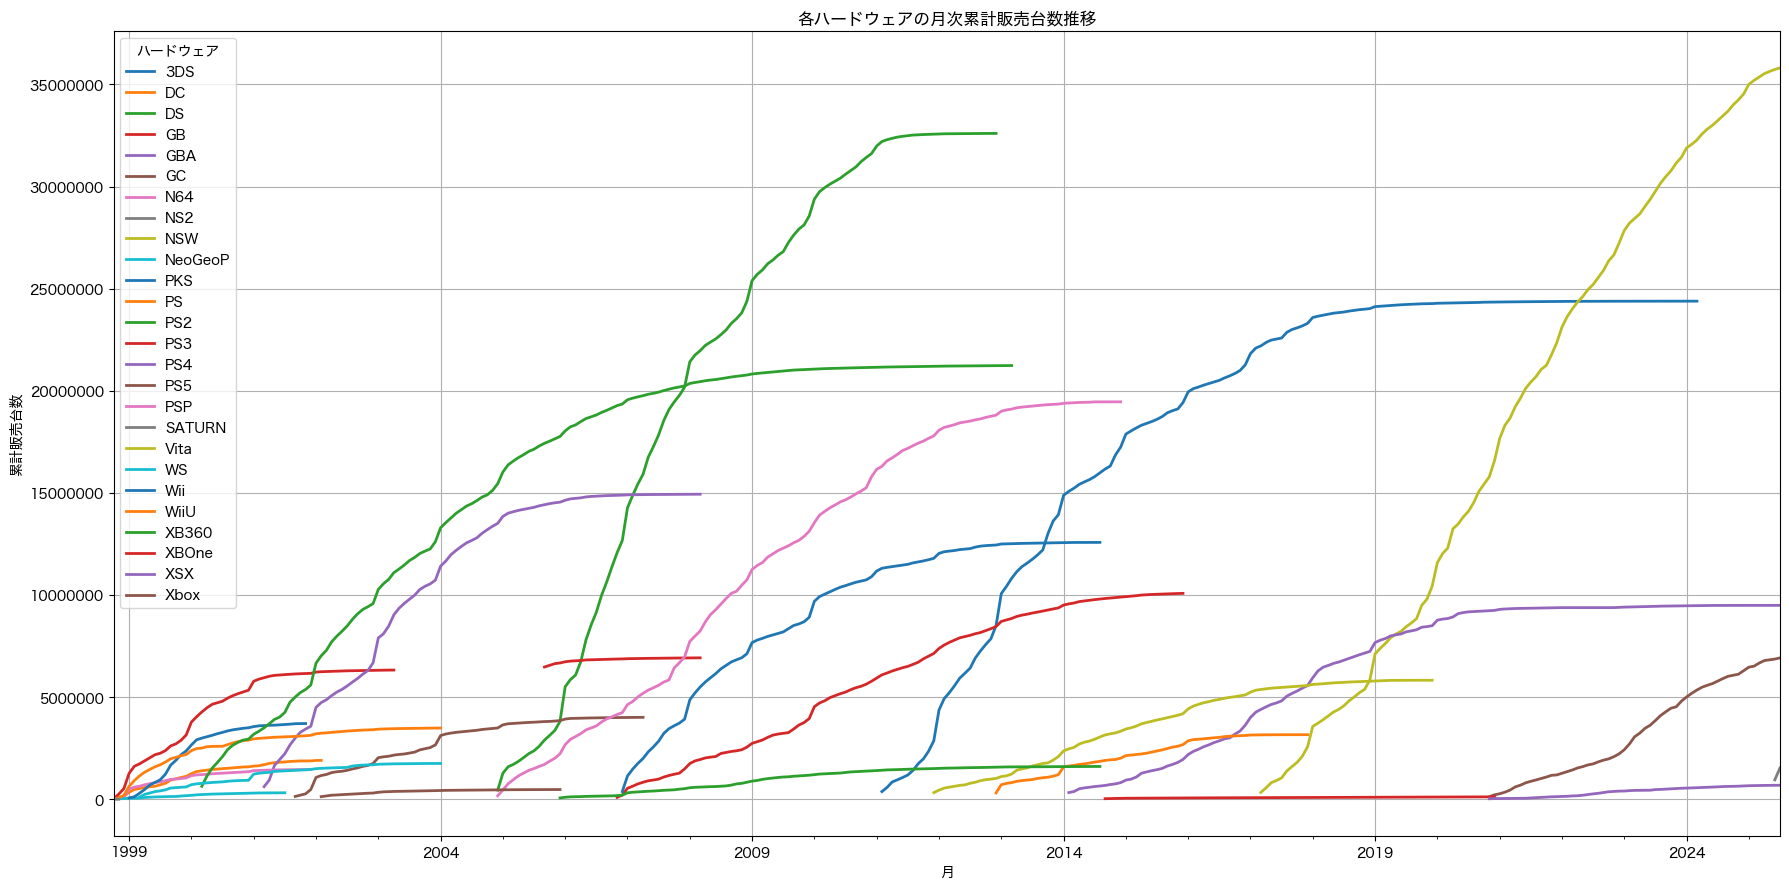

In [8]:

fig = ph.plot_cumulative_sales(hard_sales_df, hard_list, monthly=True)
fig.show()

/var/folders/p4/348jfj6522l78r8xkkk0csb40000gn/T/ipykernel_19386/1127207114.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


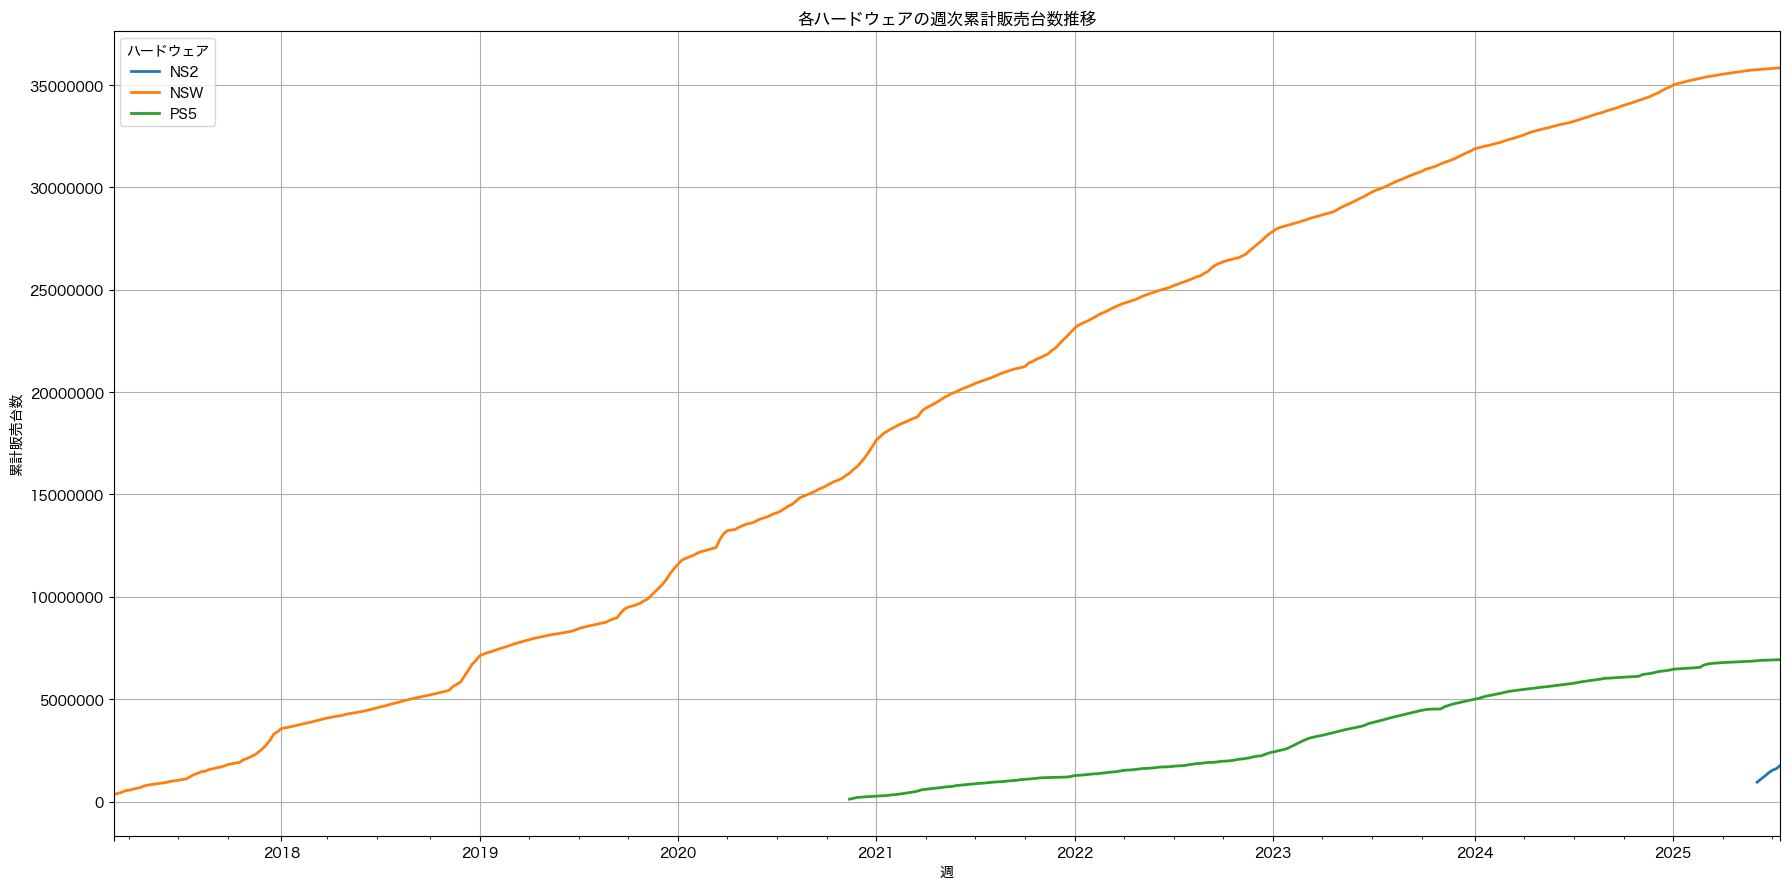

In [9]:
fig = ph.plot_cumulative_sales(hard_sales_df, ["NSW", "NS2", "PS5"])
fig.show()